# Домашнє завдання №7. Бібліотека surprise

Роботу виконано в google.colab. В стаціонарному jupyter notebook бібліотека surprize не може встановитися через pip install.


## 1. Основне завдання

#### 1.1. Отримання датасету movielens (ml-latest-small)

In [111]:
pip install surprise

In [112]:
from surprise import Dataset

data = Dataset.load_builtin("ml-100k")  # завантажуємо датасет Movielens

In [113]:
# Отримуємо доступ до сирого (raw) представлення даних з raitings.csv (userId, movieId, rating, timestamp)
raw_data = data.raw_ratings

# Виводимо перші 5 елементів даних
for i in range(5):
    print(raw_data[i])

('196', '242', 3.0, '881250949')
('186', '302', 3.0, '891717742')
('22', '377', 1.0, '878887116')
('244', '51', 2.0, '880606923')
('166', '346', 1.0, '886397596')


#### 1.2. Побудова моделі матричної факторизації

In [114]:
from surprise import SVD
# Використовується для матричної факторизації в контексті рекомендаційних систем.
# Реалізує алгоритм матричної факторизації на основі методу SVD (Singular Value Decomposition).
# Він автоматично враховує відсутні значення (пропущені оцінки) в матриці оцінок користувачів-продуктів.
from surprise.model_selection import train_test_split
# Розділення датасету на навчальну і тестову частини

In [115]:
# Розділяємо датасет на навчальну і тестову частини (тут вона складатиме 30%)
trainset, testset = train_test_split(data, test_size=0.3)

# Створюємо модель SVD
model = SVD()

# Навчаємо модель
model.fit(trainset)

In [116]:
from surprise import accuracy

# Здійснюємо прогнози на тестовому наборі
predictions = model.test(testset)

# Оцінюємо якість моделі через обчислення значення Root Mean Squared Error (RMSE)
rmse_svd = accuracy.rmse(predictions)

RMSE: 0.9514


#### 1.3. Підбір найкращих параметрів за допомогою крос-валідації для моделі SVD

In [117]:
from surprise.model_selection import KFold

# об'єкт, який буде використовуватися для розділення даних на тренувальний та тестовий набори у кілька разів (n_splits)
kf = KFold(n_splits=3)

# створимо список значень RMSE отриманих під час крос-валідації для моделі SVD
lst_rmse_svd_crv = []

# цикл крос-валідації
for trainset, testset in kf.split(data):

    model.fit(trainset)  # навчання моделі на тренувальному наборі
    predictions = model.test(testset)  # виконання прогнозів на тестовому наборі

    lst_rmse_svd_crv.append(accuracy.rmse(predictions, verbose=True)) # додавання в список значень RMSE
    # параметр verbose контролює, чи буде виведена додаткова інформація про обчислення RMSE

RMSE: 0.9486
RMSE: 0.9428
RMSE: 0.9423


#### 1.4. Підбір найкращих параметрів за допомогою алгоритму SVD++ (розширений SVD)

In [118]:
from surprise import SVDpp

# Створюємо модель SVD++
model_pp = SVDpp()

# Навчаємо модель
model_pp.fit(trainset)

In [119]:
# Здійснюємо прогнози на тестовому наборі
predictions = model_pp.test(testset)

# Оцінюємо якість моделі через обчислення значення Root Mean Squared Error (RMSE)
rmse_svdpp = accuracy.rmse(predictions)

RMSE: 0.9222


In [120]:
# створимо список значень RMSE отриманих під час крос-валідації для моделі SVD++
lst_rmse_svdpp_crv = []

# Проведемо навчання з використанням циклів крос-валідації
for trainset, testset in kf.split(data):

    model_pp.fit(trainset)
    predictions = model_pp.test(testset)
    lst_rmse_svdpp_crv.append(accuracy.rmse(predictions, verbose=True))

RMSE: 0.9329
RMSE: 0.9271
RMSE: 0.9271


#### 1.5. Підбір найкращих параметрів за допомогою алгоритму неприродженого розкладу матриці (NMF)

In [121]:
from surprise import NMF

# Створюємо модель SVD++
model_nmf = NMF()

# Навчаємо модель
model_nmf.fit(trainset)

In [122]:
# Здійснюємо прогнози на тестовому наборі
predictions = model_nmf.test(testset)

# Оцінюємо якість моделі через обчислення значення Root Mean Squared Error (RMSE)
rmse_nmf = accuracy.rmse(predictions)

RMSE: 0.9708


In [123]:
# створимо список значень RMSE отриманих під час крос-валідації для моделі NMF
lst_rmse_nmf_crv = []

# Проведемо навчання з використанням циклів крос-валідації
for trainset, testset in kf.split(data):

    model_nmf.fit(trainset)
    predictions = model_nmf.test(testset)
    lst_rmse_nmf_crv.append(accuracy.rmse(predictions, verbose=True))

RMSE: 0.9717
RMSE: 0.9787
RMSE: 0.9826


#### 1.6. Візуалізація ефективності навчання (значень RMSE) для різних алгоритмів

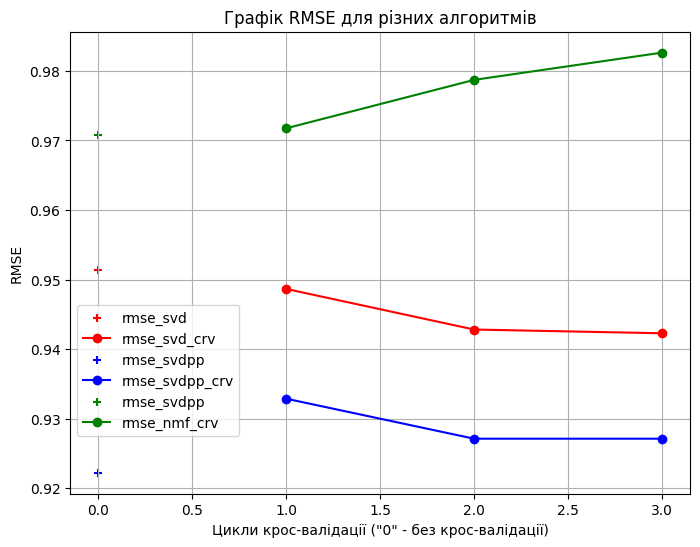

In [126]:
import matplotlib.pyplot as plt

# Створення графіка
plt.figure(figsize=(8, 6))

# Додавання точки rmse_svd
plt.scatter(0, rmse_svd, marker='+', color='red', label='rmse_svd')
# Додавання лінії з трьома точками з lst_rmse_svd_crv
plt.plot(range(1, 4), lst_rmse_svd_crv, marker='o', linestyle='-', color='red', label='rmse_svd_crv')

# Додавання точки rmse_svdpp
plt.scatter(0, rmse_svdpp, marker='+', color='blue', label='rmse_svdpp')
# Додавання лінії з трьома точками з lst_rmse_svdpp_crv
plt.plot(range(1, 4), lst_rmse_svdpp_crv, marker='o', linestyle='-', color='blue', label='rmse_svdpp_crv')

# Додавання точки rmse_nmf
plt.scatter(0, rmse_nmf, marker='+', color='green', label='rmse_svdpp')
# Додавання лінії з трьома точками з lst_rmse_nmf_crv
plt.plot(range(1, 4), lst_rmse_nmf_crv, marker='o', linestyle='-', color='green', label='rmse_nmf_crv')

# Додавання міток і заголовку
plt.title('Графік RMSE для різних алгоритмів')
plt.xlabel('Цикли крос-валідації ("0" - без крос-валідації)')
plt.ylabel('RMSE')

# Додавання легенди
plt.legend(loc='lower left', bbox_to_anchor=(0, +0.11))

# Додавання сітки
plt.grid(True)

# Відображення графіка
plt.show()

#### 1.7. Висновки щодо ефективності навчання для різних алгоритмів

З графіка бачимо, що найменше значення RMSE отримано для алгоритму SVD++ без використання крос-валідації. В даному випадку цей підхід найкращій.